In [1]:
import pandas as pd

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path = "/content/drive/My Drive/Colab Notebooks/NLP/NLP/BDD/Sentences_50Agree.xlsx"

In [5]:
df = pd.read_excel(path)
df.columns = [['Sentence','Notation']]
df

,Sentence,Notation
0,Technopolis plans to develop in stages an area...,neutral
1,The international electronic industry company ...,negative
2,With the new production plant the company woul...,positive
3,According to the company 's updated strategy f...,positive
4,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...,positive
...,...,...
4840,LONDON MarketWatch -- Share prices ended lower...,negative
4841,Rinkuskiai 's beer sales fell by 6.5 per cent ...,neutral
4842,Operating profit fell to EUR 35.4 mn from EUR ...,negative
4843,Net sales of the Paper segment decreased to EU...,negative


In [6]:
def conv(x):
  if x == 'negative' : 
    return(-1)
  if x == 'neutral':
    return(0)
  else : 
    return(1)

In [8]:
df['sentiment'] = df.apply(lambda r : conv(r['Notation']), axis=1)
df = df.drop_duplicates()
df

,Sentence,Notation,sentiment
0,Technopolis plans to develop in stages an area...,neutral,0
1,The international electronic industry company ...,negative,-1
2,With the new production plant the company woul...,positive,1
3,According to the company 's updated strategy f...,positive,1
4,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...,positive,1
...,...,...,...
4840,LONDON MarketWatch -- Share prices ended lower...,negative,-1
4841,Rinkuskiai 's beer sales fell by 6.5 per cent ...,neutral,0
4842,Operating profit fell to EUR 35.4 mn from EUR ...,negative,-1
4843,Net sales of the Paper segment decreased to EU...,negative,-1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


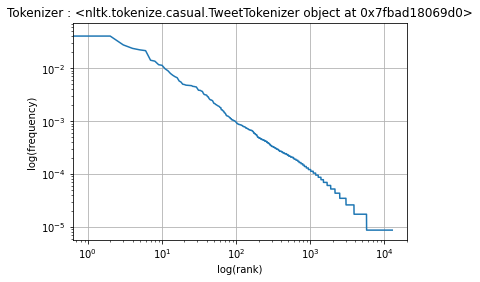

In [19]:
import matplotlib.pyplot as plt
from collections import Counter
from nltk.tokenize import TweetTokenizer
import numpy as np
Sentences = [df['Sentence'].values[i][0] for i in range(len(df))]
tok = TweetTokenizer()
arr = np.array([tok.tokenize(x) for x in Sentences])
arr = [ x for X in arr for x in X]
c = Counter(arr)
d = pd.DataFrame(c, index=['occurrences']).transpose().reset_index()
d.columns=['word', 'occurences']
  # Computing frequencies instead of occurences
nb_total = d.occurences.sum()
d['freq'] = d.occurences.apply(lambda x: x/nb_total)
  # Sorting by frequency, most frequent word at the top of the df
d = d.sort_values('freq', ascending=False)
plt.figure()
plt.grid()
plt.xscale('log')  # Using log scale
plt.yscale('log')  # Using log scale
plt.xlabel('log(rank)')
plt.ylabel('log(frequency)')
plt.title("Tokenizer : {0}".format(tok))
x = list(range(d.shape[0]))
plt.plot(x, d.freq)
plt.show()

In [21]:
import nltk
nltk.download('averaged_perceptron_tagger')
d['type'] = nltk.pos_tag(list(d.word))
d['type'] = d.apply(lambda r : r['type'][1], axis=1)
d

,word,occurences,freq,type
27,.,5508,0.047638,.
24,the,4708,0.040719,DT
23,",",4702,0.040667,","
8,of,3200,0.027676,IN
4,in,2749,0.023776,IN
...,...,...,...,...
6937,Communities,1,0.000009,NNPS
6936,Search,1,0.000009,NNP
6935,Location,1,0.000009,NNP
6934,Skanssi,1,0.000009,NNP


In [ ]:
d_clean = d[(d['type'].str[0].isin(['N', 'J'])) & (d['word'] != 's')]

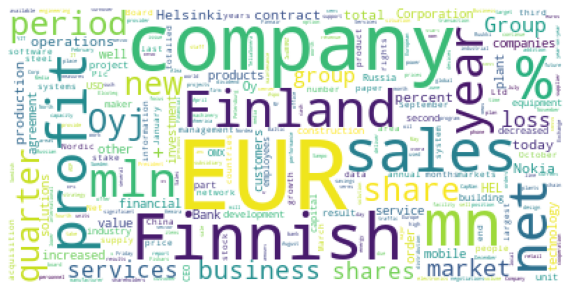

In [ ]:
from wordcloud import WordCloud
word_count_dict = d_clean.set_index('word')[['occurences']].to_dict()['occurences']
plt.figure(figsize=(10,10))
wc = WordCloud(background_color="white", max_words=1000)
wc.generate_from_frequencies(word_count_dict)
plt.clf()
plt.imshow(wc)
plt.axis('off')
plt.show()

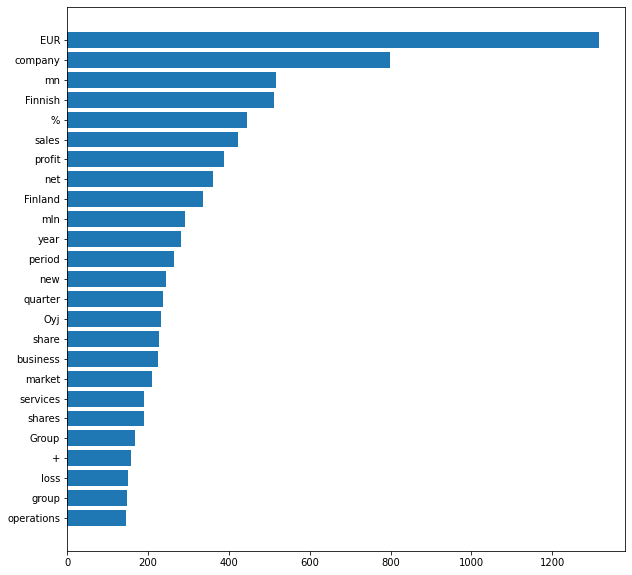

In [ ]:
plt.figure(figsize=(10,10))
top = 25
popular_words = sorted(word_count_dict, key = word_count_dict.get, reverse = True)
#popular_words_nonstop = [w for w in popular_words if w not in stopwords.words("english")]
plt.barh(range(top), [word_count_dict[w] for w in reversed(popular_words[0:top])])
plt.yticks([x for x in range(top)], reversed(popular_words[0:top]))
#plt.title(title)
plt.show()

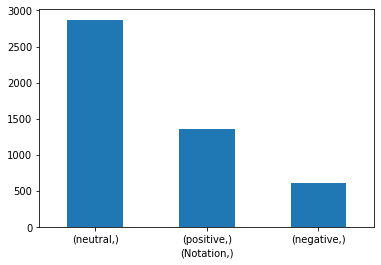

In [ ]:
df['Notation'].value_counts().plot.bar(rot=0)

In [ ]:
Counter([x for X in df.Notation.values for x in X])

Counter({'negative': 604, 'neutral': 2872, 'positive': 1363})

In [ ]:
test = df.copy()
test['Sentence'] = [tok.tokenize(x) for x in Sentences]
test_bis = test.apply(lambda x: pd.Series(x['Sentence']),axis=1).stack().reset_index(level=1, drop=True)
test_bis.name = 'Sentence'
test = test.drop('Sentence', axis=1).join(test_bis)
count_df = test.groupby(['Sentence', ('sentiment',)]).count().reset_index()
count_df['pond'] = count_df.apply(lambda x : x[('sentiment',)]*x[('Notation',)],axis=1)
count_df = count_df.groupby('Sentence').sum().drop(count_df.columns[1], axis=1)
count_df['scale'] = count_df.apply(lambda x : x['pond']/x[('Notation',)], axis=1)
count_df = count_df.drop(['pond'],axis=1).rename(columns={count_df.columns[0]:'Count'})
d['scale'] = list(count_df.loc[list(d.word)]['scale'])
d

,word,occurences,freq,type,scale
122,EUR,1315,0.011373,NNP,0.140684
72,s,1038,0.008978,NN,0.205202
101,is,920,0.007957,VBZ,0.128261
32,company,799,0.006910,NN,0.167710
34,has,577,0.004990,VBZ,0.259965
...,...,...,...,...,...
6940,MAPs,1,0.000009,NNP,1.000000
6937,Communities,1,0.000009,NNPS,1.000000
6936,Search,1,0.000009,NNP,1.000000
6935,Location,1,0.000009,NNP,1.000000


In [ ]:
d_anal = d[d.occurences > 10]

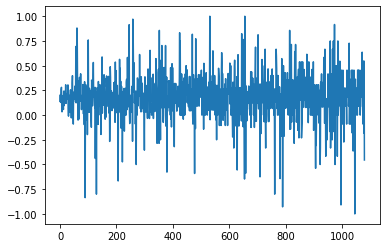

In [ ]:
x = np.linspace(0,1079,1080)
plt.plot(x,d_anal.scale)

In [ ]:
d_anal = d_anal.sort_values(by=['scale'],ascending='False')
d_anal

,word,occurences,freq,type,scale
11343,warning,11,0.000095,VBG,-1.000000
4690,temporarily,14,0.000121,RB,-0.928571
5133,lay,11,0.000095,VBD,-0.909091
535,decreased,79,0.000683,JJ,-0.835443
858,fell,55,0.000476,VBD,-0.800000
...,...,...,...,...,...
3084,awarded,35,0.000303,VBN,0.914286
3550,efficient,12,0.000104,JJ,0.916667
879,grew,34,0.000294,VBD,0.970588
3467,improved,21,0.000182,JJ,1.000000


In [ ]:
d_anal.head(20)

,word,occurences,freq,type,scale
11343,warning,11,0.000095,VBG,-1.000000
4690,temporarily,14,0.000121,RB,-0.928571
5133,lay,11,0.000095,VBD,-0.909091
535,decreased,79,0.000683,JJ,-0.835443
858,fell,55,0.000476,VBD,-0.800000
3581,dropped,15,0.000130,VBD,-0.800000
3346,lower,39,0.000337,JJR,-0.666667
8644,lay-offs,17,0.000147,JJ,-0.647059
2779,fall,14,0.000121,NN,-0.642857
1098,declined,16,0.000138,VBD,-0.625000


In [ ]:
d_anal.tail(20)

,word,occurences,freq,type,scale
59,increase,100,0.000865,VB,0.750000
545,partnership,12,0.000104,NN,0.750000
944,Africa,12,0.000104,NNP,0.750000
274,Nokian,12,0.000104,JJ,0.750000
203,signed,75,0.000649,VBD,0.760000
3026,able,17,0.000147,JJ,0.764706
64,improve,22,0.000190,VB,0.772727
164,strengthen,16,0.000138,NN,0.812500
1042,Both,22,0.000190,NNP,0.818182
424,rise,17,0.000147,NN,0.823529


In [9]:
%cd /content/drive/MyDrive/Colab Notebooks/NLP/NLP

/content/drive/MyDrive/Colab Notebooks/NLP/NLP


In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import numpy as np

In [11]:
! pip install datasets
! pip install transformers
! pip install torchinfo

     |████████████████████████████████| 325 kB 7.0 MB/s 
     |████████████████████████████████| 136 kB 72.7 MB/s 
     |████████████████████████████████| 77 kB 9.0 MB/s 
     |████████████████████████████████| 1.1 MB 80.3 MB/s 
     |████████████████████████████████| 212 kB 94.5 MB/s 
     |████████████████████████████████| 127 kB 99.4 MB/s 
     |████████████████████████████████| 94 kB 3.6 MB/s 
     |████████████████████████████████| 144 kB 78.6 MB/s 
     |████████████████████████████████| 271 kB 79.0 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
     |████████████████████████████████| 4.0 MB 9.7 MB/s 


In [12]:
import torch
from datasets import load_dataset
from tqdm import tqdm
import nltk
from gensim.models.phrases import Phrases, Phraser
from nltk.tokenize import TreebankWordTokenizer, TweetTokenizer
import pandas as pd
from termcolor import colored
from collections import Counter

In [13]:
# fasttext vectors can be imported through torch text (it will download it only once)
from torchtext.vocab import GloVe, vocab, FastText

# pretrained_vectors = GloVe(name="6B", dim='50')
pretrained_vectors = FastText(language='en')

In [14]:
from torchtext.vocab import GloVe, FastText, vocab

pretrained_vocab = vocab(pretrained_vectors.stoi)
unk_token = "<unk>"
unk_index = 0
pad_token = '<pad>'
pad_index = 1
pretrained_vocab.insert_token("<unk>",unk_index)
pretrained_vocab.insert_token("<pad>", pad_index)
#this is necessary otherwise it will throw runtime error if OOV token is queried 
pretrained_vocab.set_default_index(unk_index)
pretrained_embeddings = pretrained_vectors.vectors
pretrained_embeddings = torch.cat((torch.zeros(1,pretrained_embeddings.shape[1]),pretrained_embeddings))
pretrained_embeddings.size()

torch.Size([2519371, 300])

In [15]:
df = df.drop(columns = df.columns[1])
df.columns = ['text','label']
df

,text,label
0,Technopolis plans to develop in stages an area...,0
1,The international electronic industry company ...,-1
2,With the new production plant the company woul...,1
3,According to the company 's updated strategy f...,1
4,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...,1
...,...,...
4840,LONDON MarketWatch -- Share prices ended lower...,-1
4841,Rinkuskiai 's beer sales fell by 6.5 per cent ...,0
4842,Operating profit fell to EUR 35.4 mn from EUR ...,-1
4843,Net sales of the Paper segment decreased to EU...,-1


In [16]:
import random

mylist = [i for i in range(len(df))]
random.shuffle(mylist)
train_id = mylist[:int(0.8*len(df))]
eval_id = mylist[int(0.8*len(df)):int(0.9*len(df))]
test_id = mylist[int(0.9*len(df)):]

In [18]:
train = df.iloc[train_id]
eval = df.iloc[eval_id]
test = df.iloc[test_id]

In [19]:
import pyarrow as pa
import pyarrow.dataset as ds
import pandas as pd
from datasets import Dataset


### convert to Huggingface dataset
train = Dataset(pa.Table.from_pandas(train)).remove_columns('__index_level_0__')
eval = Dataset(pa.Table.from_pandas(eval)).remove_columns('__index_level_0__')
test = Dataset(pa.Table.from_pandas(test)).remove_columns('__index_level_0__')

In [20]:

tok = TweetTokenizer()
def tokenize_pad_numericalize(entry, vocab_stoi, max_length=20):
  text = [ vocab_stoi[token] if token in vocab_stoi else vocab_stoi['<unk>'] for token in tok.tokenize(entry.lower())]
  padded_text = None
  if len(text) < max_length:   padded_text = text + [ vocab_stoi['<pad>'] for i in range(len(text), max_length) ] 
  elif len(text) > max_length: padded_text = text[:max_length]
  else:                        padded_text = text
  return padded_text

def tokenize_all(entries, vocab_stoi):
  res = {}
  res['text'] = [tokenize_pad_numericalize(entry, vocab_stoi, max_length=200) for entry in entries['text']]
  res['label'] = entries['label']
  return res

In [21]:
train = train.map(lambda e: tokenize_all(e, pretrained_vocab.get_stoi()), batched=True)
eval = eval.map(lambda e: tokenize_all(e, pretrained_vocab.get_stoi()), batched=True)
test = test.map(lambda e: tokenize_all(e, pretrained_vocab.get_stoi()), batched=True)


  0%|          | 0/4 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

In [22]:
from torch.utils.data import Dataset
import numpy as np

class TweetDataset(Dataset):
    def __init__(self, data, args):
      # args is a dict, a nice way to share the global arguments (even accross multiple files)
      self.args = args
      self.data = data

    def __len__(self):
      return len(self.data)
    
    def __getitem__(self, idx):
      item = {
          "text": np.array(self.data[idx]['text']),
          "label": np.array(self.data[idx]['label'])
      }
      # warning: if you put   self.data['text'][idx]    it will take A LOT of time...
      ## The following code would take forever just to print next(iter(train_loader))['text'].shape
      # item = {
      #     "text": np.array(self.data['text'][idx]),
      #     "label": np.array(self.data['label'][idx])
      # }
      return item

In [23]:
# Create DataLoader
from torch.utils.data import DataLoader
args = {'bsize': 64}
train_loader = DataLoader(TweetDataset(train, args), batch_size=args['bsize'], num_workers=2, shuffle=True, drop_last=True)
val_loader   = DataLoader(TweetDataset(eval, args), batch_size=args['bsize'], num_workers=2, shuffle=True, drop_last=True)
test_loader  = DataLoader(TweetDataset(test, args), batch_size=args['bsize'], num_workers=2, shuffle=True, drop_last=True)

In [38]:
class Classifier(nn.Module):
    
    #define all the layers used in model
    def __init__(self, hidden_dim, num_layers, 
                 embedding_dim=300, dropout = 0.2, vec = pretrained_vectors.vectors):
        super().__init__()
        self.ebd = torch.nn.Embedding.from_pretrained(vec, freeze=True)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        self.linear = nn.Linear(hidden_dim, 3)
        self.dropout = nn.Dropout(0.2)        
        #activation function
        self.act = nn.Softmax()
        
    def forward(self, x):#, l):
        x = self.ebd(x)
        x = self.dropout(x)
        #x_pack = pack_padded_sequence(x, l, batch_first=True)

        lstm_out, (ht, ct) = self.lstm(x)#x_pack)
        dense_outputs=self.linear(ht[-1])
        #Final activation function
        outputs=self.act(dense_outputs)
        return outputs

In [54]:
output_size = 3
hidden_dim = 256
num_layers = 2

net = Classifier(hidden_dim,num_layers)
print(net)

Classifier(
  (ebd): Embedding(2519370, 300)
  (lstm): LSTM(300, 256, batch_first=True)
  (linear): Linear(in_features=256, out_features=3, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
  (act): Softmax(dim=None)
)


In [55]:
# loss and optimization functions
lr=0.001

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=lr)


In [56]:
train_on_gpu=torch.cuda.is_available()

In [57]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [58]:
# training params

epochs = 10 # 3-4 is approx where I noticed the validation loss stop decreasing

counter = 0
print_every = 100
clip=5 # gradient clipping
train_on_gpu = True
# move model to GPU, if available
net = net.to(device)
batch_size = 64
net.train()
# train for some number of epochs
for e in range(epochs):
    # batch loop
    for x in train_loader:
        counter += 1
        inputs = x['text'].to(device) 
        labels = x['label'].to(device)
        labels = labels + torch.ones(batch_size).to(device)

        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history

        # zero accumulated gradients
        net.zero_grad()

        # get the output from the model
        output = net(inputs)

        # calculate the loss and perform backprop
        loss = criterion(output, labels.to(int))
        loss.backward()
        # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        nn.utils.clip_grad_norm_(net.parameters(), clip)
        optimizer.step()

        # loss stats
        if counter % print_every == 0:
            # Get validation loss
            val_losses = []
            net.eval()
            for x in val_loader:

                # Creating new variables for the hidden state, otherwise
                # we'd backprop through the entire training history

                inputs = x['text'].to(device) 
                labels = x['label'].to(device)
                labels = labels + torch.ones(batch_size).to(device)
                output = net(inputs)
                val_loss = criterion(output, labels.to(int))

                val_losses.append(val_loss.item())

            net.train()
            print("Epoch: {}/{}...".format(e+1, epochs),
                  "Step: {}...".format(counter),
                  "Loss: {:.6f}...".format(loss.item()),
                  "Val Loss: {:.6f}".format(np.mean(val_losses)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 2/10... Step: 100... Loss: 0.926441... Val Loss: 0.946529
Epoch: 4/10... Step: 200... Loss: 0.895200... Val Loss: 0.962145
Epoch: 5/10... Step: 300... Loss: 0.863992... Val Loss: 0.957678
Epoch: 7/10... Step: 400... Loss: 0.973315... Val Loss: 0.964341
Epoch: 9/10... Step: 500... Loss: 1.003965... Val Loss: 0.955302
Epoch: 10/10... Step: 600... Loss: 0.983430... Val Loss: 0.952376


In [61]:
# Get test data loss and accuracy

test_losses = [] # track loss
num_correct = 0
acc_it = []
pred = []
true = []

# init hidden state

net.eval()
# iterate over test data
for x in test_loader:

    # Creating new variables for the hidden state, otherwise
    # we'd backprop through the entire training history

    inputs = x['text'].to(device) 
    labels = x['label'].to(device) 
    labels = labels + torch.ones(batch_size).to(device)
    # get predicted outputs
    output = net(inputs)
    
    # calculate loss
    test_loss = criterion(output, labels.to(int))
    test_losses.append(test_loss.item())
    
    # convert output probabilities to predicted class (0 or 1)
    #pred = torch.round(output.squeeze())  # rounds to the nearest integer
    _, tag_seq  = torch.max(output, 1)
    correct = (tag_seq.flatten() == labels.flatten()).float().sum()
    acc = correct / labels.flatten().size(0)
    acc_it.append(acc.item())
    pred.append(tag_seq)
    true.append(labels)
    
    
    # compare predictions to true label
    """
    correct_tensor = pred.eq(labels.float().view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    num_correct += np.sum(correct)
    """


# -- stats! -- ##
# avg test loss
print("Test loss: {:.3f}".format(np.mean(test_losses)))

# accuracy over all test data
acc_it_avg = sum(acc_it)/len(acc_it)
print("Test accuracy: {:.3f}".format(acc_it_avg))

Test loss: 0.992
Test accuracy: 0.551


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


In [44]:
import torch.nn as nn

class SentimentRNN(nn.Module):
    """
    The RNN model that will be used to perform Sentiment analysis.
    """

    def __init__(self, output_size, hidden_dim, n_layers, vec = pretrained_vectors.vectors, embedding_dim=300, drop_prob=0.5):
        """
        Initialize the model by setting up the layers.
        """
        super(SentimentRNN, self).__init__()

        self.output_size = output_size
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim
        
        # embedding and LSTM layers
        #self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.ebd = torch.nn.Embedding.from_pretrained(vec, freeze=True)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers,
                            dropout=drop_prob, batch_first=True)
        
        # dropout layer
        self.dropout = nn.Dropout(0.3)
        
        # linear and sigmoid layer
        self.fc = nn.Linear(hidden_dim, output_size)
        self.sig = nn.Softmax(dim=1)

    def forward(self, x, hidden):
        """
        Perform a forward pass of our model on some input and hidden state.
        """
        batch_size = x.size(0)
        
        # embeddings and lstm_out
        embeds = self.ebd(x)
        lstm_out, hidden = self.lstm(embeds, hidden)
        
        # stack up lstm outputs
        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim)
        
        # dropout and fully connected layer
        out = self.dropout(lstm_out)
        out = self.fc(out)
        
        # sigmoid function
        sig_out = self.sig(out)
        
        # reshape to be batch_size first
        sig_out = sig_out.view(batch_size, -1)
        sig_out = sig_out[:, -1] # get last batch of labels
        
        # return last sigmoid output and hidden state
        return sig_out, hidden
    
    
    def init_hidden(self, batch_size):
        ''' Initializes hidden state '''
        # Create two new tensors with sizes n_layers x batch_size x hidden_dim,
        # initialized to zero, for hidden state and cell state of LSTM
        weight = next(self.parameters()).data
        
        if(train_on_gpu):
          hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda(),
                   weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda())
        else:
          hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_(),
                   weight.new(self.n_layers, batch_size, self.hidden_dim).zero_())
        
        return hidden